# Primary Component Analysis

## Import packages

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

## BGR to RGB converter

In [37]:
def convert_image(img):
    # enables mayplotlib to plot OpenCV images,
    # converts image from BGR to RGB
    new_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return new_img

## Read and display image

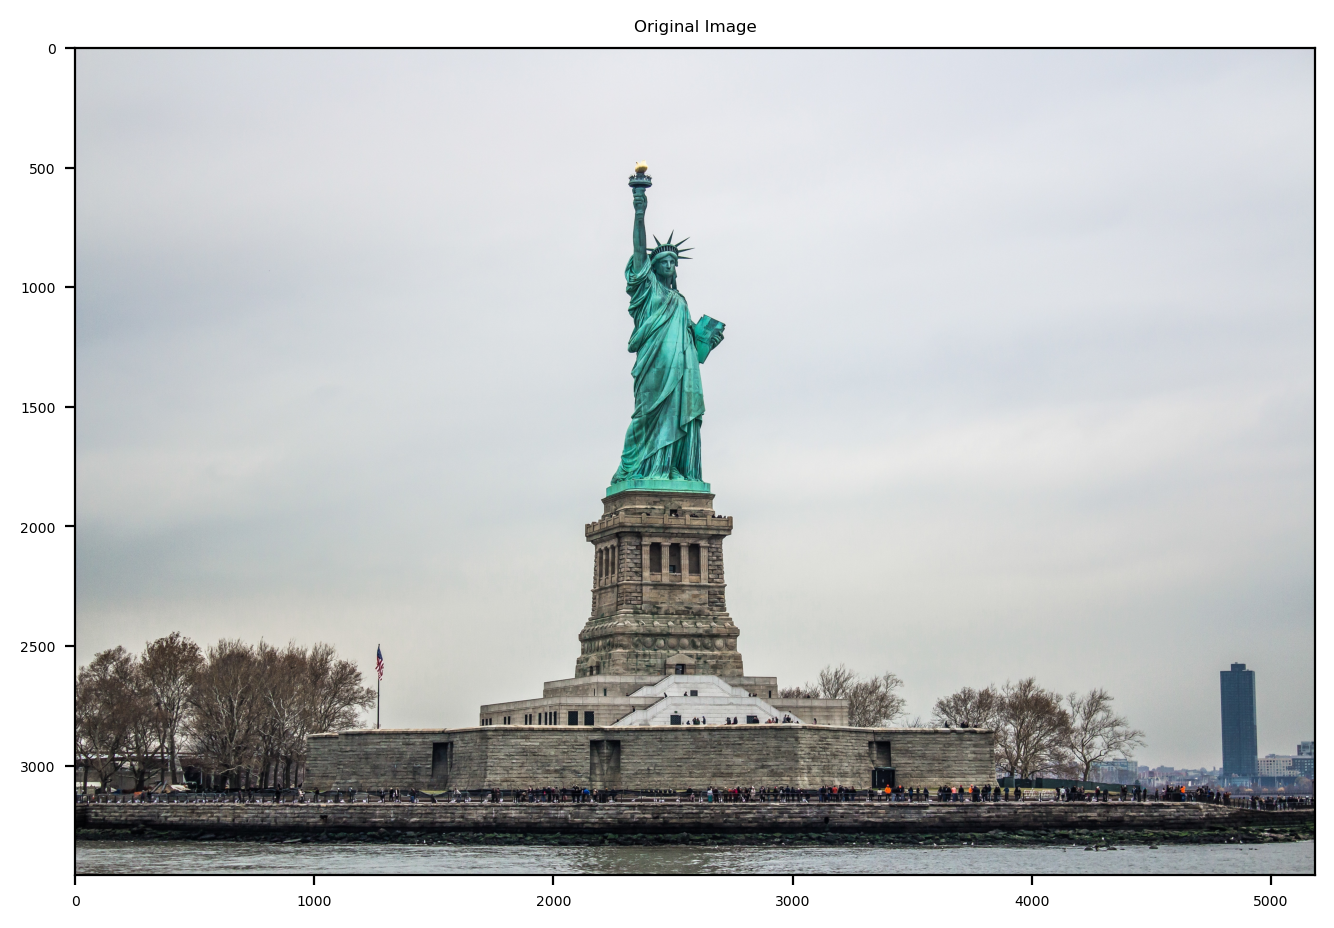

In [38]:
# read in image
img = cv2.imread("liberty.jpg")

# display image
plt.rc('font', size=5)
plt.figure(figsize=(8, 8), dpi=200)
plt.title("Original Image")
plt.imshow(convert_image(img))
plt.show()

## Split image into 16x16 patches 

In [39]:
# split array into blocks of given dimension
def blockshaped(arr, nrows, ncols):
    h = arr.shape[0]
    w = arr.shape[1]
    assert h % nrows == 0, "{} rows is not evenly divisble by {}".format(h, nrows)
    assert w % ncols == 0, "{} cols is not evenly divisble by {}".format(w, ncols)
    return (arr.reshape(h//nrows, nrows, -1, ncols)
               .swapaxes(1,2)
               .reshape(-1, nrows, ncols))

# separate color channels
R, G, B = cv2.split(img)

# split channels into 16x16 blocks
red_patches = blockshaped(R,16,16)
#green_patches = blockshaped(G,16,16)
#blue_patches = blockshaped(B,16,16)

## Vectorise each patch & find the mean of the patches

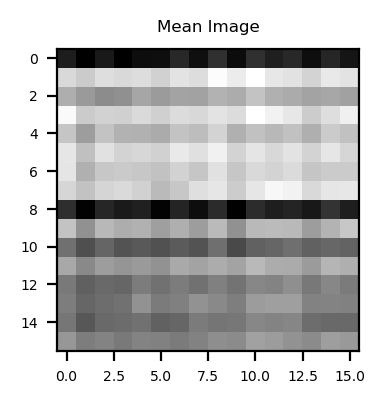

In [40]:
# vectorise patches
flattened_patches = [patch.flatten() for patch in red_patches]

# find the mean
img_mean = np.mean(flattened_patches, axis=0)

# display mean image
plt.rc('font', size=5)
plt.figure(figsize=(2, 2), dpi=200)
plt.title("Mean Image")
plt.imshow(img_mean.reshape(16,16), cmap='gray')
plt.show()

# center of gravity of the points
center = flattened_patches - img_mean

## Find the covariance matrix and the eigenvectors & eigenvalues

In [41]:
# find the covariance matrix
covariance_matrix = np.cov(center.T)

# find eigenvectors & eigenvalues
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

# Sort eigenvalues from highest to lowest
idx = eigen_values.argsort()[::-1]
eigen_values = eigen_values[idx]

# sort eigenvectors from one associated with the highest eigenvalue to the one associated with the lowest
eigen_vectors = eigen_vectors[:,idx]

## Reconstruct image

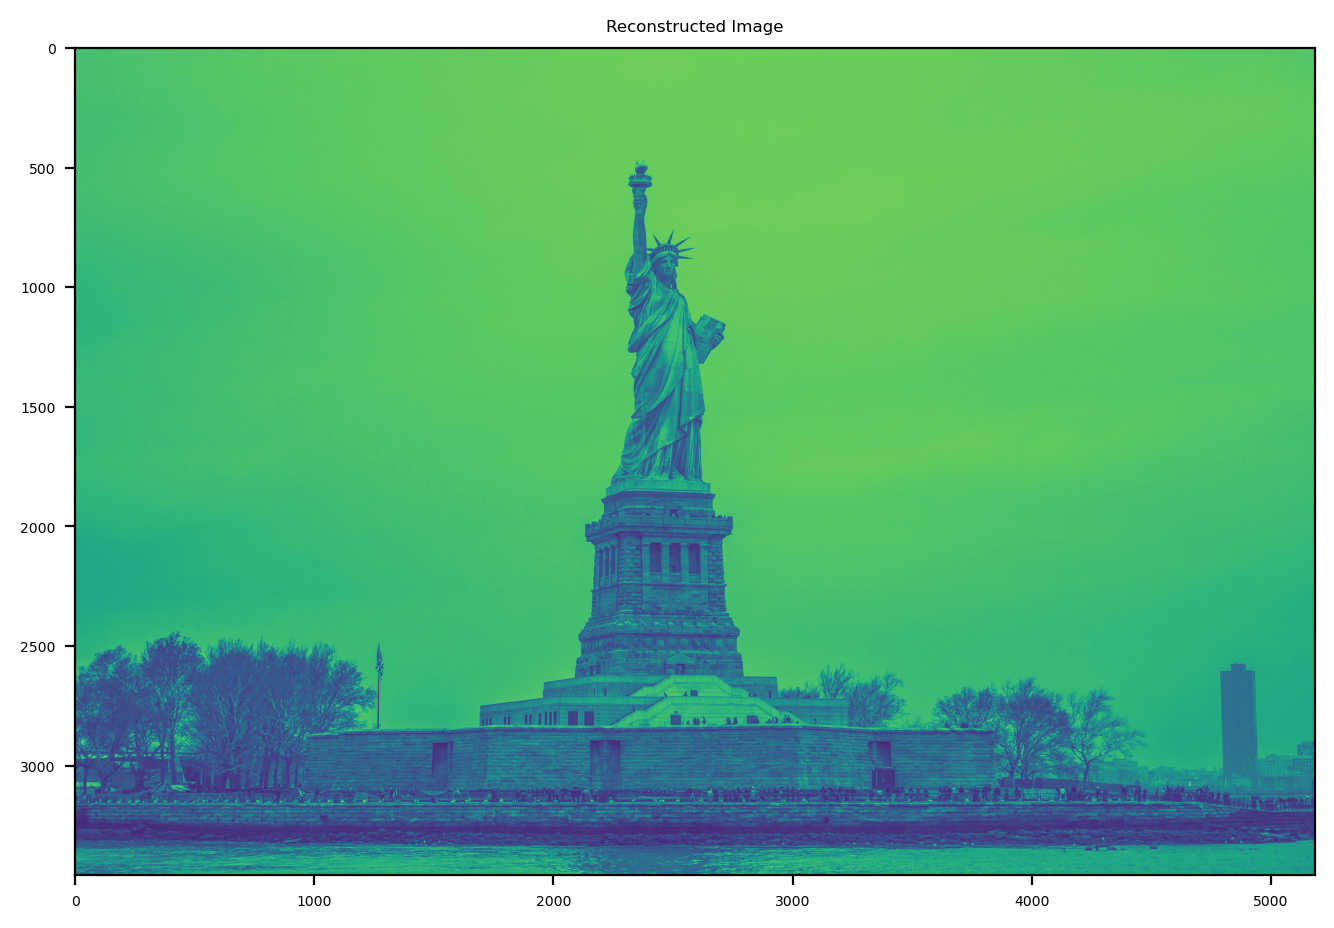

In [42]:
# reconstruct the given patch against k principal components
# reconstructed = PCA_score.eigenvectors.T - mean
def reconstruct(k, patch):
    vectors = (eigen_vectors[:,:k])
    vectors_transpose = vectors.T
    pca_scores = np.matmul(patch, vectors)
    pdv = np.matmul(pca_scores, vectors_transpose)
    rec = pdv + img_mean
    return rec

# store reconstructed patches
rec_patches = []

# principal components 
k=100

# send centered patches to reconstruct method
for i in range(0, center.shape[0]):
    p = reconstruct(k, center[i,:])
    p = p.reshape(16,16)
    rec_patches.append(p)
rec_patches = np.array(rec_patches)

# empty array the size of original image
recImg = np.zeros((img.shape[0], img.shape[1]))

# piece reconstructed patches into image
counter = 0
for i in range(0, img.shape[0], 16):
            for j in range(0, img.shape[1], 16):
                patch = rec_patches[counter]
                recImg[i:i + 16, j:j + 16] = patch
                counter += 1

# display original image
plt.rc('font', size=5)
plt.figure(figsize=(8, 8), dpi=200)
plt.title("Reconstructed Image")
plt.imshow(recImg)
plt.show()
